In [90]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data,columns=iris.feature_names)

In [91]:
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


### Feature Scaling
데이터를 전처리해서 모델이 학습을 잘 할 수 있게 해준다. feature의 범위를 조절해주는 작업. 이것을 안하면 모델이 큰 값을 보이는 feature에 민감하게 반응해서 학습하기 때문에 정확도가 떨어질 수 밖에 없다.       

### 표준화 
표준화의 경우는 데이터가 정규분포를 따라간다. 하지만 범위 제한이 없다 sklearn.preprocessing.StandardScaler 를 사용한다.

### 정규화
정규화의 경우 데이터를 일정한 범위 내로 만들어줘서 모델에서 지나친 영향력을 보이는 것을 방지할 수 있다. sklearn.preprocessing.MinMaxScaler가 있다. 하지만 분포를 조절해야되는 경우에는 적합하지 않다. (분포가 동일하기 때문에)

In [95]:
from sklearn.preprocessing import StandardScaler #표준화
scaler = StandardScaler()
standard = scaler.fit_transform(iris_df)
print(pd.DataFrame(data=standard,columns=iris.feature_names))
print(pd.DataFrame(data=standard,columns=iris.feature_names).describe())

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -0.900681          1.019004          -1.340227         -1.315444
1            -1.143017         -0.131979          -1.340227         -1.315444
2            -1.385353          0.328414          -1.397064         -1.315444
3            -1.506521          0.098217          -1.283389         -1.315444
4            -1.021849          1.249201          -1.340227         -1.315444
..                 ...               ...                ...               ...
145           1.038005         -0.131979           0.819596          1.448832
146           0.553333         -1.282963           0.705921          0.922303
147           0.795669         -0.131979           0.819596          1.053935
148           0.432165          0.788808           0.933271          1.448832
149           0.068662         -0.131979           0.762758          0.790671

[150 rows x 4 columns]
       sepal length (cm)  sepal width (c

In [96]:
from sklearn.preprocessing import MinMaxScaler #정규화
mn_sclaer = MinMaxScaler()
mn = mn_sclaer.fit_transform(iris_df)
print(pd.DataFrame(data=mn,columns=iris.feature_names))
print(pd.DataFrame(data=mn,columns=iris.feature_names).describe())

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0             0.222222          0.625000           0.067797          0.041667
1             0.166667          0.416667           0.067797          0.041667
2             0.111111          0.500000           0.050847          0.041667
3             0.083333          0.458333           0.084746          0.041667
4             0.194444          0.666667           0.067797          0.041667
..                 ...               ...                ...               ...
145           0.666667          0.416667           0.711864          0.916667
146           0.555556          0.208333           0.677966          0.750000
147           0.611111          0.416667           0.711864          0.791667
148           0.527778          0.583333           0.745763          0.916667
149           0.444444          0.416667           0.694915          0.708333

[150 rows x 4 columns]
       sepal length (cm)  sepal width (c

### 의사결정나무 (Decision Tree)
트리 모델 중 가장 유명한 의사결정 나무이다. 여러번 사용해봤다.      

#### 장점
사람이 이해할 수 있으며 모델을 시각화할 수 있어서 white box알고리즘이다.      
데이터 전처리를 거의 요구하지 않습니다.       
모델의 복잡도는 데이터의 복잡도에 비례한다. 즉 학습에 사용되는 자원을 쉽게 예측할 수 있다.       
숫자형 및 범주형 데이터를 가리지 않는다. 즉 편하게 사용 가능하다.     

#### 단점
과적합에 취약하다      
입력데이터의 차이가 조금만 나도 트리가 많이 변화할 수 있다.     
입력값의 범위 바깥에서 나타나는 데이터를 예측하기에 적합한 모델은 아니다.     
최적의 의사결정 나무 모델을 학습시키는 것은 사실 구할 수 없다. 최적의 알고리즘을 찾아낼 수 없다. (증명 불가)

In [105]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.4, random_state=42)

d_tree = DecisionTreeClassifier(random_state=42)
d_tree.fit(X_train,y_train)

y_pred = d_tree.predict(X_test)
acc = metrics.accuracy_score(y_test,y_pred)
confusion_mat = metrics.confusion_matrix(y_test,y_pred)

print('Decision tree acc :',acc)
print('confusion matrix : \n',confusion_mat)

Decision tree acc : 0.9666666666666667
confusion matrix : 
 [[23  0  0]
 [ 0 18  1]
 [ 0  1 17]]


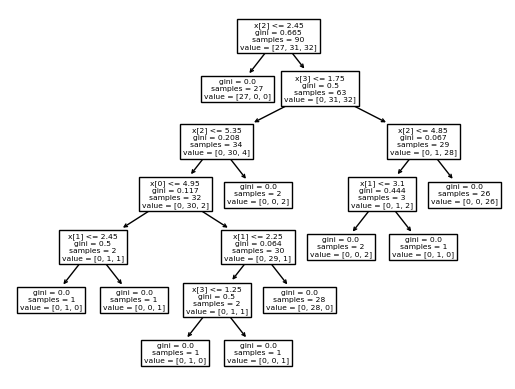

In [106]:
# decision tree 시각화
plot_tree(d_tree)
plt.show()

### 특성 중요도 (Feature Importance)
기계학습 모델의 학습이 끝나고, 이상한 기준으로 분류하는 경우에 모델을 조정하거나 feature engineering에 기반한 feature selection 과정이 뒤따른다.    
이를 통해서 불필요한 feature를 제거하고 모델의 성능을 좀 더 상승시킬 수 있다.      
사이킷런에서는 이를 위해서 model.feature_importances_를 통해서 구할 수 있다. 

[0.01364649 0.05458596 0.53904595 0.39272159]


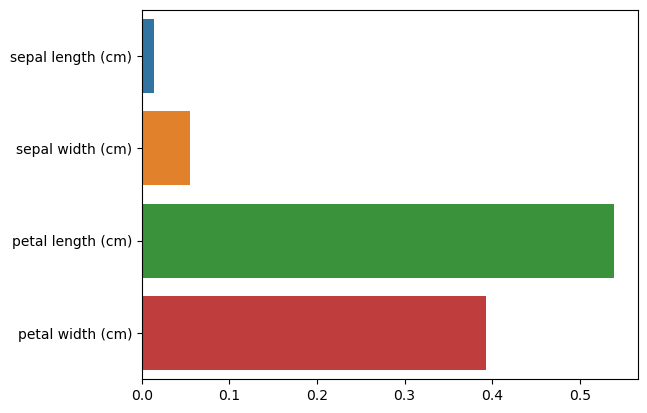

In [112]:
print(d_tree.feature_importances_)
ax = sns.barplot(x=d_tree.feature_importances_,y=iris_df.columns)

### 교차검증(Cross Validation)
교차검증이란, 학습중인 모델의 성능을 평가하는 방법으로 고정된 검증 데이터셋을 보통 사용하는데, 이 경우 validation set에 과적합하게 될 수 있기 때문에 다양한 검증 데이터를 가지고 평가한다.
따라서 학습데이터셋을 K개로 나눠놓고 하나씩 검증 데이터셋으로 변경해가면서 학습을 하고 검증을 한다. 최종 평가는 K번 평가 결과의 평균값을 사용한다.(앙상블 아닌가?)     
sklearn.model_selection에서 사용할 수 있다.     

#### 장점
학습을 좀 더 정밀하게 할 수 있다.

#### 단점
K만큼 시간이 증가한다. 한번마다 모델을 한번씩 초기화하고 학습하고 평균을 내기 때문이다.      
      
### Stratified K-Fold Cross Validation
학습 데이터를 만들 때 라벨 분포가 조금씩 몰려있거나 하는 경우로 인해서 학습이 잘 안될 수 있다.      
이를 방지하기 위한 방법으로 클래스마다 비율을 설정해줘서 k-fold를 해주는 방법이 있다.     
하지만 그냥 shuffle을 잘 하면 어느정도 해결되는 문제이기 때문에 그닥 잘 쓰이진 않을 수 있다. 알고 있으면 좋을것 같은 내용     


In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np
X = iris.data
y = iris.target
tree = DecisionTreeClassifier(random_state=42)

kfold = KFold(n_splits=5,shuffle=True,random_state=42)
cv_index = kfold.split(X) # Train set split해줌 K개로
all_acc = []

k = 1
for train_idx, test_idx in cv_index:
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    tree.fit(X_train,y_train)
    acc = tree.score(X_test,y_test)
    print(f'{k}번째 fold acc : {acc}')
    all_acc.append(acc)

print(f'mean accuracy : {np.mean(all_acc)}')

1번째 fold acc : 1.0
1번째 fold acc : 0.9666666666666667
1번째 fold acc : 0.9333333333333333
1번째 fold acc : 0.9333333333333333
1번째 fold acc : 0.9333333333333333
mean accuracy : 0.9533333333333335


In [114]:
from sklearn.model_selection import StratifiedKFold

dt_clf = DecisionTreeClassifier(random_state=42)

# Stratified 5-fold CV
skfold = StratifiedKFold(n_splits=5, shuffle=True,random_state=42)
cv_index = skfold.split(X, y)

cv_accuracy = []
ind = 1

for train_index, test_index in cv_index:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    dt_clf.fit(X_train , y_train)
    accuracy = dt_clf.score(X_test, y_test)

    print(f'{ind}번째 Cross Validation 정확도: {accuracy:.2%}')
    cv_accuracy.append(accuracy)

    ind += 1

print(f'''-------------------------------------------
Cross Validation 정확도 평균: {np.mean(cv_accuracy):.2%}''')

1번째 Cross Validation 정확도: 100.00%
2번째 Cross Validation 정확도: 96.67%
3번째 Cross Validation 정확도: 93.33%
4번째 Cross Validation 정확도: 96.67%
5번째 Cross Validation 정확도: 90.00%
-------------------------------------------
Cross Validation 정확도 평균: 95.33%


### 하이퍼파라미터 탐색
기계학습과 딥러닝은 hyperparameter라는 것이 존재한다. 이는 모델의 학습과정에 사용되지 않아서 업데이트 되지 않고 사람이 직접 설정해주는 값이다.     
하지만 모델의 성능에 이 값이 영향을 끼쳐서 최적의 하이퍼파라미터를 설정해줘야한다. 보통 최적 파라미터를 탐색하는데 많은 시간이 소요된다.     
GridSearch, RandomSearch Cross Validation 등의 방법이 있고 역시 사이킷런 sklearn.model_selection에서 사용할 수 있다.    

### 최적화 (Optimization)
하이퍼파라미터 튜닝을 하는 과정이다. 하지만 보통 어떻게 설정해줘야하는지 모르기 때문에 GridSearch 와 같은 방법들을 사용한다.

### GridSearch Cross Validation
GridSearchCV는 가능한 모든 하이퍼 파라미터의 조합 중 최적의 조합을 찾는다. 하지만 모든 경우의 수를 찾아보기 때문에 컴퓨팅 파워가 많이 든다.

In [120]:
#GridSearch CV
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.2,random_state=42)
d_tree_ = DecisionTreeClassifier(random_state=42)
parameters = {'max_depth':range(1,10),'min_samples_split':range(2,5),'min_samples_leaf':range(1,5)} #이와 같이 하이퍼파라미터의 범위를 설정해준다. key-value로

grid = GridSearchCV(d_tree_,param_grid=parameters,cv=3,refit=True,return_train_score=True) #3fold cv로 최적의 결과를 탐색한다. 이는 cv_results_로 저장되고 조회해서 조합을 찾아볼 수 있다.
#만약 정확도가 가장 높게 나오는 조합을 자동으로 확정하고 싶다면 GridSearchCV의 refit을 True로 설정해주면 된다.
grid.fit(X_train,y_train)

score_df = pd.DataFrame(grid.cv_results_)
score_df[['params', 'mean_test_score', 'rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.675,97,0.675,0.675,0.675
1,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.675,97,0.675,0.675,0.675
2,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.675,97,0.675,0.675,0.675
3,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.675,97,0.675,0.675,0.675
4,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.675,97,0.675,0.675,0.675
...,...,...,...,...,...,...
103,"{'max_depth': 9, 'min_samples_leaf': 3, 'min_s...",0.950,1,1.000,0.900,0.950
104,"{'max_depth': 9, 'min_samples_leaf': 3, 'min_s...",0.950,1,1.000,0.900,0.950
105,"{'max_depth': 9, 'min_samples_leaf': 4, 'min_s...",0.950,1,1.000,0.900,0.950
106,"{'max_depth': 9, 'min_samples_leaf': 4, 'min_s...",0.950,1,1.000,0.900,0.950


In [121]:
print('Best parameters', grid.best_params_)
print('Best Score', grid.best_score_)

Best parameters {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score 0.9499999999999998


### RandomSearch CV
하지만 GridSearch는 너무 오래걸린다. 단순하게 3개의 파라미터만 해도 107개의 조합이 나왔다. 거기에 cv가 3이니 3배가 된다.     
데이터셋이 좀 작고 파라미터의 탐색 범위가 단순하고 적다면 문제가 되지 않겠지만 딥러닝으로 들어가게 된다면 진짜 몇 일을 돌려야할 수 있다.     
따라서 Random하게 찾는 방법 또한 존재한다. 이 경우 최적의 파라미터를 찾지는 못하지만 적은 컴퓨팅 파워로 만족스러운 결과를 얻을 수 있다.    
하지만 예전에 학교 수업에 강의오신 선배님 말로는 실무에서는 시간이 오래걸려도 좋은 결과가 있는 것이 좋으므로 gridsearch를 사용한다는 말을 했던 것 같다.

In [122]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=d_tree_,param_distributions=parameters,n_iter=10,cv=3,random_state=42,n_jobs=1)
random_search.fit(X_train,y_train)

scored_df = pd.DataFrame(random_search.cv_results_)
scored_df[['params', 'mean_test_score', 'rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'min_samples_split': 4, 'min_samples_leaf': 2...",0.933333,7,0.975,0.900,0.925
1,"{'min_samples_split': 3, 'min_samples_leaf': 4...",0.675000,8,0.675,0.675,0.675
2,"{'min_samples_split': 3, 'min_samples_leaf': 2...",0.675000,8,0.675,0.675,0.675
3,"{'min_samples_split': 4, 'min_samples_leaf': 4...",0.950000,1,1.000,0.900,0.950
4,"{'min_samples_split': 4, 'min_samples_leaf': 1...",0.941667,6,0.975,0.900,0.950
5,"{'min_samples_split': 3, 'min_samples_leaf': 3...",0.950000,1,1.000,0.900,0.950
6,"{'min_samples_split': 2, 'min_samples_leaf': 3...",0.950000,1,1.000,0.900,0.950
7,"{'min_samples_split': 2, 'min_samples_leaf': 4...",0.950000,1,1.000,0.900,0.950
8,"{'min_samples_split': 4, 'min_samples_leaf': 4...",0.950000,1,1.000,0.900,0.950
9,"{'min_samples_split': 4, 'min_samples_leaf': 4...",0.675000,8,0.675,0.675,0.675


In [123]:
print(f'best params:', random_search.best_params_)
print(f'best score {random_search.best_score_:.2%}')

best params: {'min_samples_split': 4, 'min_samples_leaf': 4, 'max_depth': 7}
best score 95.00%
